In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow_decision_forests

In [ ]:
pip install tensorflowjs

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow_decision_forests as tfdf

In [ ]:
cleaned = pd.read_csv('cleaned.csv').rename({'Unnamed: 0': 'index'}, axis=1).set_index('index')

In [ ]:
train = cleaned[['age', 'age_o', 'race', 'race_o', 'interests_correlate',
                 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
                 'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important'
                ]]

race_map = {
    'European/Caucasian-American':'Caucasian', 
    'Other':'Other',
    'Asian/Pacific Islander/Asian-American': 'Asian',
    'Latino/Hispanic American':'Latinx',
    'Black/African American':'Black'
}

train = train.assign(race = train.race.map(lambda x: race_map[x]),
            race_o = train.race_o.map(lambda x: race_map[x]))

In [ ]:
#.drop(columns=['field', 'decision', 'decision_o', 'match'])
trainx = pd.get_dummies(train, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(trainx, cleaned.match, test_size=0.2)

#scaler = StandardScaler().fit(X_train)
#X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
#X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)
class_weights

array([0.60710608, 2.83413462])

In [ ]:
train_weights = y_train.map(lambda x: class_weights[x]).to_numpy()

In [ ]:
model2 = tfdf.keras.GradientBoostedTreesModel(num_trees=1000)

Use /tmp/tmpa_vxvjog as temporary training directory


In [ ]:
model2.fit(x=X_train.to_numpy(), y=y_train.to_numpy(), sample_weight=train_weights)

Reading training dataset...
Training dataset read in 0:00:04.828992. Found 4716 examples.
Training model...
Model trained in 0:00:01.309229
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [ ]:
preds = model2.predict(X_test)

37/37 [==============================] - 0s 945us/step


In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs
from google.colab import files

In [ ]:
model2.save('matchmodel_current')

In [ ]:
model2.save('/content/drive/MyDrive/models/matchmodel_current')

In [ ]:
model = tf.keras.models.load_model("matchmodel_current")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/models

/content/drive/MyDrive/models


In [ ]:
model = tf.keras.models.load_model("matchmodel_current")

In [ ]:
tfjs.converters.tf_saved_model_conversion_v2.convert_keras_model_to_graph_model(model, "./matchmodel_current_js")

Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


Can not freeze saved model v1.


In [ ]:
preds = model.predict(X_test)

37/37 [==============================] - 0s 2ms/step


In [ ]:
acc = accuracy_score(y_test, [(a>0.5)*1 for a in preds.flatten()])
bacc = balanced_accuracy_score(y_test, [(a>0.5)*1 for a in preds.flatten()])
f1 = f1_score(y_test, [(a>0.5)*1 for a in preds.flatten()])

print('Test scores')
print(f'accuracy = {acc*100:.2f}')
print(f'balanced accuracy = {bacc*100:.2f}')
print(f'f1 score = {f1*100:.2f}')

Test scores
accuracy = 72.18
balanced accuracy = 73.39
f1 score = 45.33


In [ ]:
preds = model.predict(X_train)

acc = accuracy_score(y_train, [(a>0.5)*1 for a in preds.flatten()])
bacc = balanced_accuracy_score(y_train, [(a>0.5)*1 for a in preds.flatten()])
f1 = f1_score(y_train, [(a>0.5)*1 for a in preds.flatten()])

print('Train scores')
print(f'accuracy = {acc*100:.2f}')
print(f'balanced accuracy = {bacc*100:.2f}')
print(f'f1 score = {f1*100:.2f}')

148/148 [==============================] - 0s 2ms/step
Train scores
accuracy = 70.74
balanced accuracy = 71.14
f1 score = 46.39


<Axes: ylabel='Density'>

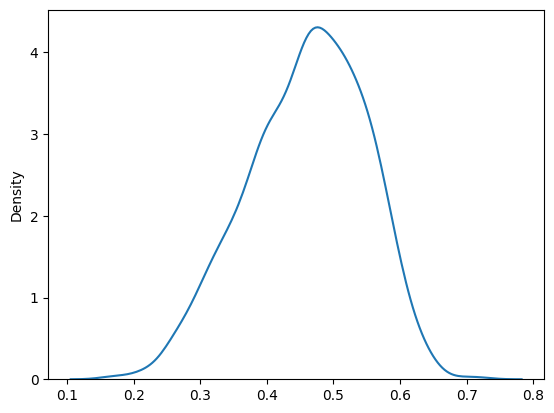

In [ ]:
sns.kdeplot(preds.flatten())